In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [11]:
df=pd.read_csv(r'C:\Users\FLUTE\Desktop\diabetes.csv')

In [12]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
df.shape  #shape of the data

(768, 9)

In [14]:
x=df.drop('Outcome',axis=1).values  #created numpy arrays for features and target
y=df['Outcome'].values

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=42,stratify=y)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
neighbors=np.arange(1,9)   #setup arrays to store training and test accuracies
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn=KNeighborsClassifier(n_neighbors=k)  #setup a knn classifier with k neighbors
    
    knn.fit(x_train,y_train)  #Model fitting
    
    train_accuracy[i] = knn.score(x_train,y_train) #compute accuracy on the train set
    test_accuracy[i] = knn.score(x_test,y_test) #compute accuracy on the test set

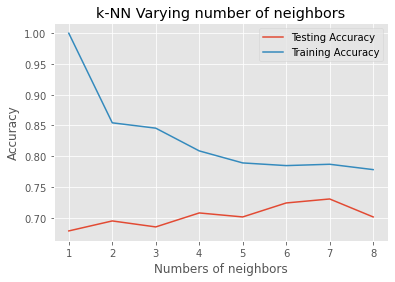

In [23]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors,test_accuracy,label='Testing Accuracy')
plt.plot(neighbors,train_accuracy,label='Training Accuracy')
plt.legend()
plt.xlabel('Numbers of neighbors')
plt.ylabel('Accuracy')
plt.show()

We can observe that we get maximum testing accuracy for k=7.So lets create a KNeighborsClassifier with number of neighbors as 7

In [25]:
knn=KNeighborsClassifier(n_neighbors=7)   #setup knn classifier with k neighbors

In [26]:
knn.fit(x_train,y_train) #model fitting

KNeighborsClassifier(n_neighbors=7)

In [27]:
knn.score(x_test,y_test) #Getting accuracy

0.7305194805194806

In [28]:
y_pred=knn.predict(x_test) 

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
confusion_matrix(y_test,y_pred)

array([[165,  36],
       [ 47,  60]], dtype=int64)

In [34]:
pd.crosstab(y_test,y_pred,rownames=['True'],colnames=['predicted'],margins=True)

predicted,0,1,All
True,,,
0,165,36,201
1,47,60,107
All,212,96,308


In [35]:
from sklearn.metrics import classification_report

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       201
           1       0.62      0.56      0.59       107

    accuracy                           0.73       308
   macro avg       0.70      0.69      0.70       308
weighted avg       0.73      0.73      0.73       308



In [38]:
y_pred_proba=knn.predict_proba(x_test)[:,1]

In [39]:
from sklearn.metrics import roc_curve

In [40]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)

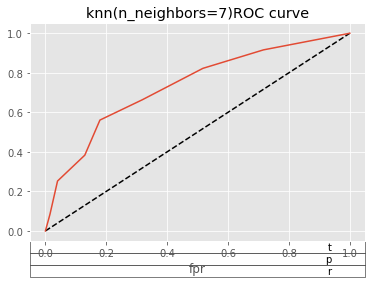

In [41]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='knn')
plt.xlabel('fpr')
plt.table('tpr')
plt.title('knn(n_neighbors=7)ROC curve')
plt.show()

In [43]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)    #Area under ROC curve

0.7345050448691124

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
param_grid={'n_neighbors':np.arange(1,50)}

In [47]:
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(x,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [48]:
knn_cv.best_score_

0.7578558696205755

In [49]:
knn_cv.best_params_

{'n_neighbors': 14}

Thus a knn classifier with number of neighbor as 14 achieves the best score/accuracy of 0.7578 i.e. about 76%